# Error-space diagram - example for 1 input pair, 1 derived var, 1 region

#### Load needed packages

In [1]:
import rpy2

# necessary to workaround the error: /u01/anaconda2/lib/libreadline.so.6: undefined symbol: PC
# https://www.rittmanmead.com/blog/2016/07/using-r-jupyter-notebooks-big-data-discovery/
import readline

%load_ext rpy2.ipython

In [2]:
%%R
#remove.packages('seacarb')
#install.packages('seacarb')

NULL


In [3]:
%%R
#libraries previously installed using:
library(seacarb)
library(oce)
library(gsw)

#library(Hmisc)   #for minor ticks in plot

/homel/cnangini/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Le chargement a nécessité le package : oce

  warnings.warn(x, RRuntimeWarning)
/homel/cnangini/anaconda/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Le chargement a nécessité le package : gsw

  warnings.warn(x, RRuntimeWarning)


In [4]:
%%R
packageVersion('seacarb')

[1] ‘3.1.1’


In [5]:
%%R
?carb

R Help on ‘carb’carb                  package:seacarb                  R Documentation

_P_a_r_a_m_e_t_e_r_s _o_f _t_h_e _s_e_a_w_a_t_e_r _c_a_r_b_o_n_a_t_e _s_y_s_t_e_m

_D_e_s_c_r_i_p_t_i_o_n:

     Returns parameters of the seawater carbonate system.

_U_s_a_g_e:

     carb(flag, var1, var2, S=35, T=25, Patm=1, P=0, Pt=0, Sit=0,
             k1k2="x", kf="x", ks="d", pHscale="T", b="u74", gas="potential", warn="y")
     
_A_r_g_u_m_e_n_t_s:

    flag: select the couple of variables available. The flags which can
          be used are:

          flag = 1 pH and CO2 given

          flag = 2 CO2 and HCO3 given

          flag = 3 CO2 and CO3 given

          flag = 4 CO2 and ALK given

          flag = 5 CO2 and DIC given

          flag = 6 pH and HCO3 given

          flag = 7 pH and CO3 given

          flag = 8 pH and ALK given

          flag = 9 pH and DIC given

          flag = 10 HCO3 and CO3 given

          fla

## 1. Get routines and specify input vars

### 1.1 Read in new and modified functions 

The commands below read in routines that have been modified (derivnum and errors) or are completely new relative to the standard version of the seacarb distribution.  You can get these new and modified routines from github:

git clone https://github.com/jamesorr/seacarb-git.git

Then just change the directory in the 4 lines of the cell just below:

In [6]:
%%R
#branch buffesm1 of seacarb-git
source("/homel/cnangini/PROJECTS/seacarb-git/R/errhalf.R")
source("/homel/cnangini/PROJECTS/seacarb-git/R/errmid.R")
source("/homel/cnangini/PROJECTS/seacarb-git/R/errors.R")
source("/homel/cnangini/PROJECTS/seacarb-git/R/derivnum.R")

### 1.2 Specify input variables and their corresponding uncertainties (errors)

In [7]:
%%R

# Specify flag & corresponding 2 input variables 
  menu_flag = 15  #15

# Input variables:
# ----------------
# Approximate regional mean for Southern Ocean (picked off of Fig. 3.2 from Orr, 2011)
# For ALK & DIC input pair
  ALK  = 2295e-6  #(umol/kg)
  DIC  = 2155e-6

  temp = -0.49    #C
  salt = 33.96    #psu
  press = 0       #bar

  Phos = 2.e-6    #(umol/kg)
  Sil = 60.e-6    #(umol/kg)

# Uncertainties in input variables
# ---------------------------------
  ALK_e <- seq(0., 20., 1.0) * 1e-6
  DIC_e <- ALK_e
  pCO2_e <- seq(0,20,1)
  pH_e   <- seq(0,0.03,0.0015)

  salt_e = 0.01   
  temp_e = 0.01   

  Pt_e = 0.1e-6
  Sit_e = 4.0e-6

### 1.3 Default uncertainties in equilibrium constants (pK0, pK1, pK2, pKb, pKw, pKa, pKc, Bt)

In [8]:
%%R
# Estimates for errors in constants in errors.R routine (from Orr et al., 2017)
  epKstd  <- c(0.004, 0.015,  0.03, 0.01,  0.01, 0.02, 0.02, 0.01)
# epKstd  <- c(0.004, 0.015,  0.03, 0.01,  0.01, 0.02, 0.02)

### 1.3 Compute derived carbonate system vars with std seacarb routine `carb`:

In [9]:
%%R
# Compute derived carbonate system variables with standard seacarb routine 'carb':

# Southern Ocean
vars <- carb  (flag=menu_flag, var1=ALK, DIC, S=salt, T=temp, Patm=1, P=press, Pt=Phos, Sit=Sil, 
                    k1k2='w14', kf='dg', ks="d", pHscale="T", b="u74", gas="potential", warn='n')

pH <- vars$pH
pCO2 <- vars$pCO2

# Compute H+ from pH, i.e., pH = -log10[H+], where [H+] is the hydrogen ion concentration in mol/kg
H = 10^(-1*vars$pH)

# Keep only key columns to be consistent with output from 'errors.R' routine (called below)
vars <- data.frame(H, vars[,c('pH','CO2','fCO2','pCO2','HCO3','CO3','OmegaAragonite','OmegaCalcite')] )
vars

# Duplicate rows in *vars* until same as number of members of error vector ALK_e
numerrs <- length(ALK_e)
vars <- vars[rep(row.names(vars), numerrs), ]


In [10]:
%%R
dim(vars)

[1] 21  9


### 1.4 Use 1-D error vectors to build 2-D error array (to plot contours in DIC-ALK space)  

In [11]:
%%R
DIC_e

 [1] 0.0e+00 1.0e-06 2.0e-06 3.0e-06 4.0e-06 5.0e-06 6.0e-06 7.0e-06 8.0e-06
[10] 9.0e-06 1.0e-05 1.1e-05 1.2e-05 1.3e-05 1.4e-05 1.5e-05 1.6e-05 1.7e-05
[19] 1.8e-05 1.9e-05 2.0e-05


In [12]:
%%R
ALK_e

 [1] 0.0e+00 1.0e-06 2.0e-06 3.0e-06 4.0e-06 5.0e-06 6.0e-06 7.0e-06 8.0e-06
[10] 9.0e-06 1.0e-05 1.1e-05 1.2e-05 1.3e-05 1.4e-05 1.5e-05 1.6e-05 1.7e-05
[19] 1.8e-05 1.9e-05 2.0e-05


In [13]:
%%R
  dat <- expand.grid(DIC_e, ALK_e)

In [14]:
%%R
dim(dat)

[1] 441   2


### 1.5 Specify state-of-art (soa) errors for vars: from error-propagation manuscript (Orr et al. 2017, Table 1) 

These will be plotted as crosses on the error-space diagrams

In [15]:
%%R
ALK_e_soa   <- 2 #umol/kg
DIC_e_soa   <- 2 #umol/kg

ALK_e_soa2  <- c(ALK_e_soa, ALK_e_soa)
DIC_e_soa2  <- c(DIC_e_soa, DIC_e_soa)

ALK_e_soa2
DIC_e_soa2

[1] 2 2


## 2. Compute derived variables (with `carb`) and propagated errors (with `errors`)

### 2.1 Computations of derived vars and their errors (for At-Ct pair only) 

In [16]:
%%R
# Compute variables
vars <- carb  (flag=menu_flag, var1=ALK, var2=DIC, S=salt, T=temp, Patm=1, P=press, Pt=Phos, Sit=Sil, 
                    k1k2='w14', kf='dg', ks="d", pHscale="T", b="u74", gas="potential", warn='n')

H = 10^(-1*vars$pH)         # H+ concentration (mol/kg)
vars <- data.frame(H, vars) # Add H+ as new column to vars data frame

# Absolute errors: propagated uncertainties 
absEt <- errors (flag=menu_flag, var1=ALK, var2=DIC, S=salt, T=temp, 
                      Patm=1, P=press, Pt=Phos, Sit=Sil, 
                      evar1=dat$Var2, evar2=dat$Var1, eS=0, eT=0, ePt=0, eSit=0, epK=epKstd,
                      k1k2='w14', kf='dg', ks="d", pHscale="T", b="u74", gas="potential", warn='no')

# Aboslute error from constants only (all other input errors assumed to be zero)
absEk <- errors  (flag=menu_flag, var1=ALK, var2=DIC, S=salt, T=temp, 
                       Patm=1, P=press, Pt=Phos, Sit=Sil, 
                       evar1=0, evar2=0, 
                       eS=0, eT=0, ePt=0, eSit=0, epK=epKstd,
                       k1k2='w14', kf='dg', ks="d", pHscale="T", b="u74", gas="potential", warn='n')

# Keep only key columns in vars for consistency with columns in absEt
vars <- vars[,colnames(absEt)] 
vars

# Duplicate rows in *vars* until same as number of members of error vector ALK_e
numerrs <- length(dat$Var1)
vars <- vars[rep(row.names(vars), numerrs), ]

#Relative errors (in percent)
relEk <- 100* absEk / vars[1,]        #Relative error from constants only
relEt <- 100* absEt / vars            #Total relative error (from constants and other input variables)
relEk

         H        pH      CO2     fCO2     pCO2      HCO3    CO3 OmegaAragonite
1 4.139159 0.2216044 4.929374 5.014682 5.014689 0.1866465 2.7889       5.383828
  OmegaCalcite
1     5.383828


In [17]:
%%R
relEk

         H        pH      CO2     fCO2     pCO2      HCO3    CO3 OmegaAragonite
1 4.139159 0.2216044 4.929374 5.014682 5.014689 0.1866465 2.7889       5.383828
  OmegaCalcite
1     5.383828


### 2.2 Define simpler names of variables to be plotted

In [18]:
%%R
#   Absolute changes (fCO2 missing):
    pH       <- absEt$pH
    pCO2     <- absEt$pCO2
    CO3      <- absEt$CO3
    CO2      <- absEt$CO2
    pCO2socn <- absEt$pCO2
    OmegaA   <- absEt$OmegaAragonite
    HCO3     <- absEt$HCO3
    H        <- absEt$H

#   Relative changes:
    rCO3  <- relEt$CO3
    rH    <- relEt$H
    rpCO2 <- relEt$pCO2
    rCO2  <- relEt$CO2
    #rpCO2   <- relEt$pCO2 ###DUPLICATE
    rOmegaA <- relEt$OmegaAragonite
    rHCO3   <- relEt$HCO3
    H       <- absEt$H

    rHCO3H <- sqrt(rHCO3^2 + rH^2)


In [19]:
%%R
menu_outvar = "CO3"
er_outvar = relEt[[menu_outvar]]

In [20]:
%%R
er_outvar

  [1]  2.788900  2.840769  2.990981  3.225830  3.528454  3.883040  4.276683
  [8]  4.699578  5.144517  5.606253  6.080962  6.565831  7.058765  7.558188
 [15]  8.062893  8.571947  9.084620  9.600332 10.118617 10.639101 11.161475
 [22]  2.845577  2.896431  3.043898  3.274954  3.573420  3.923945  4.313857
 [29]  4.733432  5.175461  5.634663  6.107164  6.590105  7.081350  7.579284
 [36]  8.082672  8.590554  9.102179  9.616949 10.134385 10.654099 11.175772
 [43]  3.009210  3.057343  3.197398  3.418093  3.705046  4.044179  4.423505
 [50]  4.833572  5.267204  5.719044  6.185102  6.662396  7.148675  7.642224
 [57]  8.141721  8.646136  9.154655  9.666631 10.181542 10.698965 11.218552
 [64]  3.263751  3.308183  3.438034  3.644185  3.914600  4.236993  4.600448
 [71]  4.996012  5.416656  5.856978  6.312861  6.781168  7.259495  7.745987
 [78]  8.239196  8.737985  9.241452  9.748871 10.259655 10.773327 11.289492
 [85]  3.589915  3.630357  3.749066  3.938972  4.190407  4.493053  4.837307
 [92]  5.214

## 3. Compute other parts of error-space diagrams

### 3.1 Constants-pair CURVE (along which propagated error from constants equals that from the input pair)

In [21]:
%%R
# Critical curves (Constants-Pairs curve)
# ===============
# Southern Ocean
errcirc <- errhalf(flag=menu_flag, var1=ALK, var2=DIC, S=salt, T=temp, 
                   Patm=1, P=press, Pt=Phos, Sit=Sil,
                   epK=epKstd,
                   k1k2='l', kf='dg', ks="d", pHscale="T", b="u74", gas="potential", warn="n")  
sig1_AtCt   <- data.frame(errcirc[1]) * 1e+6
sig2_AtCt   <- data.frame(errcirc[2]) * 1e+6
sigy_AtCt   <- data.frame(errcirc[3]) 
sig1hp_AtCt <- data.frame(errcirc[4]) * 1e+6
sig2hp_AtCt <- data.frame(errcirc[5]) * 1e+6

### 3.2 Balanced-pair LINE (along which both members of input pair contrbute equally to propagated error)

In [22]:
%%R
sigyspct <- seq(0,20,by=0.1) # in percent

# At-Ct pair
# ----------
# Southern Ocean
errm <- errmid(flag=menu_flag, var1=ALK, var2=DIC, S=salt, T=temp, 
                   Patm=1, P=press, Pt=Phos, Sit=Sil,
                   sigyspct, epK=epKstd,
                   k1k2='l', kf='dg', ks="d", pHscale="T", b="u74", gas="potential", warn="n")  
sigm1_AtCt   <- data.frame(errm[1]) * 1e+6
sigm2_AtCt   <- data.frame(errm[2]) * 1e+6

## 4. Plot results: contours of calculated errors from input errors

### 4.1 Create file 'prettyaxes.R' to beautify subsequent plots (call it in cell below)

In [23]:
%%R
cat(' box()\n',
    'axis(1,labels=FALSE, tcl=-0.35) ; axis(1, lwd=0, line=-0.4, labels=TRUE)\n',
    'axis(2,labels=FALSE,tcl=-0.35)  ; axis(2, lwd=0, line=-0.4, las=2, labels=TRUE)\n',
    'axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)\n',
   file='prettyaxes.R')

### 4.2 Function to strip NaNs and add a 0 at beginning of a vector

In [24]:
%%R
zenon <- function(x){
       # Get rid of NaN's
       x <- c(0.0, x[!is.na(x)]) 
       return(x)
}

### 4.3 Function to make plot

In [25]:
%%R
plterrcontour <- function(sigcritXa, sigcritYa, xlab, ylab, subtitle, xlim, ylim,
                           sighpXa, sighpYa,
                           sigmidXa, sigmidYa,
                           sigsoaX, sigsoaY,
                           x, y, za, levels1,
                           methoda='flattest'){
    
#   Region 'a' is Southern Ocean  ;  Region 'b' is Tropics:
    # 'contour' command must come after any 'plot', 'lines', or 'points' commands 
    plot (sigcritXa, sigcritYa, xlab=xlab, ylab=ylab, plot.title=title(main=subtitle),
          xlim=xlim, ylim=ylim, col="black", type='l', lwd=4, lty='solid',xaxt='n',yaxt='n',
          cex.lab=1.4, ann=F, xaxs='r', yaxs='r')
#   Plot critical point
    if ( is.null(sighpXa) ) {
        points(sigcritXa[11], sigcritYa[11], col="black", cex=1.7, pch=19)
    } else {
        points(sighpXa, sighpYa, col="black", cex=1.7, pch=19)
    }    
#   Plot mid-line (where e1 = e2 on each isoline [and between isolines])
    lines(sigmidXa, sigmidYa, col="black", lwd=1, lty='solid')
#   symbols(x=sigcritXb[11], y=sigcritYb[11], circles=1, inches=1/3, ann=F, bg="steelblue2", fg=NULL, add=TRUE)
#   Plot point(s) at state-of-the-art (soa) for absolute error in each member of the input pair
#   - pH has 2 points (random & overall error); other 3 input variables only have 1 point
    points(sigsoaX, sigsoaY, col="black", cex=1.7, pch=4)
    axis(1,labels=TRUE, tcl=-0.35, cex.axis=1.3) 
    axis(2, tcl=-0.35, labels=FALSE, las=0) 
    title(xlab = xlab, cex.lab = 1.4, line = 2.9)
    title(ylab = ylab, cex.lab = 1.4, line = 1.9)

#   Add 2 colored text strings near origin to indicate the propagated error at the origin (from constants only)
    a0 <- za[1,1]
    if (a0 < 1) {ndiga <- 2} else {ndiga <- 3}
    mtext( format(a0, digits=ndiga), side=1, line=2.5, at=0, srt=0,  cex=1.05, col='blue')

#  'contour' command MUST come after any 'plot', 'lines', or 'points' commands 
#   For 'method', use 'simple, edge or flattest (flattest looks best but seems to fail often when lines are vertical)
    contour(x, y , za, levels=levels1, method=methoda, col="blue", lty=1, lwd=2, 
            yaxt='n', , labcex=1.0, add=TRUE)
    axis(2, tcl=-0.35, labels=FALSE) 

    axis(2, tcl=-0.35, labels=FALSE, las=0) ; 
    axis(2, lwd=0, line=-0.4, las=2, labels=TRUE, cex.axis=1.4)
    axis(3,labels=FALSE,tcl=-0.35) ; axis(4,labels=FALSE,tcl=-0.25)
    done <- c('error contour plot')
#return(NULL)
}

### 4.4 Error-space diagram of relative error in CO3  for At-Ct input pair

Combine (1) contour plot of CO3 with (2) constants-pair curve, (3) balanced-pair line, ane (4) symbol indicating current state-of-the-art uncertainty.

In [26]:
%%R
dim(er_outvar)

NULL


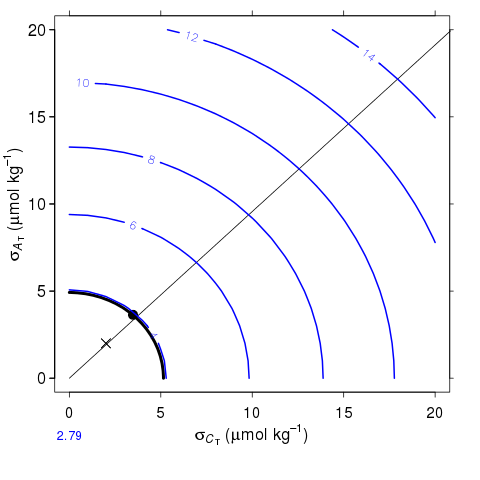

In [28]:
%%R
### Start PDF device driver to save output to figure.pdf
# Comment out line below & last line of this script to display resulting graph on computer screen
# pdf(file="halfway_CO3.pdf",  width=10.0, height=7.0)

  options(repr.plot.width=7.0, repr.plot.height=7)


#     dim(rCO3) <- c(length(DIC_e), length(ALK_e))
    dim(er_outvar) <- c(length(DIC_e), length(ALK_e))

#   pdf(file="Fig_AbsErrContours2_trop_socn.pdf")
    par(mfrow=c(1,1), mar=c(4,3.7,1,1.5)+0.1, oma=c(2,0,0,0.5), mgp=c(2,1,0), font.main=1) 

    subtitle <- NULL

#   At-Ct
#   -------------------
    xlabel <- expression(paste(sigma[italic("C")[T]]," (",mu,"mol kg"^{-1},")",sep=""))
    ylabel <- expression(paste(sigma[italic("A")[T]]," (",mu,"mol kg"^{-1},")",sep=""))

    sigcritXa <- sig2_AtCt$CO3  ;  sigcritYa <- sig1_AtCt$CO3  #sig2_ is x axis; sig1_ is y axis
    x <- DIC_e*1e+6  ;  y <- ALK_e*1e+6
    za <- er_outvar #rCO3  
    xlim <- c(0,20)  ; ylim <- xlim
    levels1 <- c(1,seq(2,20,by=2))  

    plterrcontour (sigcritXa, sigcritYa, xlabel, ylabel, subtitle, xlim, ylim,
                   sig1hp_AtCt$CO3, sig2hp_AtCt$CO3,
                   zenon(sigm2_AtCt$CO3), zenon(sigm1_AtCt$CO3),
                   DIC_e_soa2, ALK_e_soa2,
                   x, y, za, levels1,
                   'flattest')

# Turn off device driver (to flush output to PDF)
# dev.off()

***Figure:*** Percent relative uncertainty in computed $[\text{CO}_3^{2-}]$ from the $A_\text{T}-C_\text{T}$ input pair as a function of uncertainties in each member of that input pair. Each of those members is indicated by the x- and y-axis labels. Propagated relative error (in percent) is shown for the Southern Ocean (blue solid lines). Sublots without pH as an input member also include the Constants-Pair curve (thick black line), where the total propagated error from the constants is equal to that from the input pair. The balanced-pair line (thin black line) indicates where each member of the input pair contributes equally to total propagated error. 